## Recommendation using Deep learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/datasets/PromptCloudHQ/flipkart-products

In [3]:
df = pd.read_csv('../data/flipkart_com-ecommerce_sample.csv')

In [4]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."


In [5]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [10]:
df = df.drop(['crawl_timestamp', 'is_FK_Advantage_product', 'brand', 'product_specifications'], axis=1)

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19917 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uniq_id                19917 non-null  object 
 1   product_url            19917 non-null  object 
 2   product_name           19917 non-null  object 
 3   product_category_tree  19917 non-null  object 
 4   pid                    19917 non-null  object 
 5   retail_price           19917 non-null  float64
 6   discounted_price       19917 non-null  float64
 7   image                  19917 non-null  object 
 8   description            19917 non-null  object 
 9   product_rating         19917 non-null  object 
 10  overall_rating         19917 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.8+ MB


In [29]:
df[df['product_rating'] != "No rating available"].shape

(1839, 11)

In [15]:
def preprocess_price(price):
    price = str(price).replace("₹", "")
    price = price.replace(",", "")
    
    return float(price)

def preprocess_percentage(percentage):
    percentage = percentage.replace("%", "")
    return float(percentage)

In [16]:
# df['discounted_price'] = df['discounted_price'].apply(lambda x: preprocess_price(x))
# df['actual_price'] = df['actual_price'].apply(lambda x: preprocess_price(x))

In [17]:
# df['discount_percentage'] = df['discount_percentage'].apply(lambda x: preprocess_percentage(x))

In [18]:
# df[df['rating'] == "|"]

In [19]:
# df.drop(1279, inplace=True)

In [20]:
# df['rating'] = df['rating'].apply(lambda x: float(x))

In [26]:
# df['rating_count'] = df['rating_count'].apply(lambda x: preprocess_price(x))

OPTIONAL (NOT DONE YET)

In [50]:
import nltk

In [53]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [59]:
wordsList = nltk.word_tokenize(df['product_name'][1])
wordsList = [w for w in wordsList if not w in stop_words]
tagged = nltk.pos_tag(wordsList)
words = []
for word, tag in tagged:
    if tag == "NNP" or tag == "JJ":
        words.append(word)

In [61]:
tagged

[('Ambrane', 'NNP'),
 ('Unbreakable', 'JJ'),
 ('60W', 'CD'),
 ('/', 'JJ'),
 ('3A', 'CD'),
 ('Fast', 'NNP'),
 ('Charging', 'NNP'),
 ('1.5m', 'CD'),
 ('Braided', 'NNP'),
 ('Type', 'NNP'),
 ('C', 'NNP'),
 ('Cable', 'NNP'),
 ('Smartphones', 'NNP'),
 (',', ','),
 ('Tablets', 'NNP'),
 (',', ','),
 ('Laptops', 'NNP'),
 ('&', 'CC'),
 ('Type', 'NNP'),
 ('C', 'NNP'),
 ('devices', 'NNS'),
 (',', ','),
 ('PD', 'NNP'),
 ('Technology', 'NNP'),
 (',', ','),
 ('480Mbps', 'CD'),
 ('Data', 'NNP'),
 ('Sync', 'NNP'),
 (',', ','),
 ('Quick', 'NNP'),
 ('Charge', 'NNP'),
 ('3.0', 'CD'),
 ('(', '('),
 ('RCT15A', 'NNP'),
 (',', ','),
 ('Black', 'NNP'),
 (')', ')')]

OPTIONAL END

In [6]:
from sentence_transformers import SentenceTransformer

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
model = SentenceTransformer("distilbert-base-nli-mean-tokens")

In [33]:
df = df.reset_index(drop=True)

In [50]:
def clean_category_tree(s):
    n_s = ""
    for word in s[1:-1].split(">>"):
        n_s += word.strip() + " , "
    
    return n_s

In [52]:
df['product_category_tree'] = df['product_category_tree'].apply(lambda x: clean_category_tree(x))

In [17]:
# product_name_embedding = model.encode(df['product_name'])
# category_embedding = model.encode(df['category'])
# about_product_embedding = model.encode(df['about_product'])
# product_name_embedding.shape, category_embedding.shape, about_product_embedding.shape

In [53]:
product_name_embedding = model.encode(df['product_name'])
category_embedding = model.encode(df['product_category_tree'])
about_product_embedding = model.encode(df['description'])

In [73]:
type(category_embedding)

numpy.ndarray

In [74]:
with open('product_name_embedding.npy', 'wb') as f:
    np.save(f, product_name_embedding)

In [75]:
with open('category_embedding.npy', 'wb') as f:
    np.save(f, category_embedding)

In [76]:
with open('about_product_embedding.npy', 'wb') as f:
    np.save(f, about_product_embedding)

In [54]:
product_name_embedding.shape, category_embedding.shape, about_product_embedding.shape

((19917, 768), (19917, 768), (19917, 768))

In [2]:
import tensorflow as tf

In [3]:
from keras.layers import Input, Conv1D, Flatten, Dense, Reshape, Conv1DTranspose, Concatenate, concatenate
from keras import Model

In [57]:
768*3

2304

In [58]:
product_name_embedding =  np.expand_dims(product_name_embedding, axis=1)
category_embedding = np.expand_dims(category_embedding, axis=1)
about_product_embedding = np.expand_dims(about_product_embedding, axis=1)

In [4]:
product_name_embedding = np.load('./product_name_embedding.npy')
category_embedding = np.load('./category_embedding.npy')
about_product_embedding = np.load('./about_product_embedding.npy')

In [5]:
product_name_embedding.shape, category_embedding.shape, about_product_embedding.shape

((19917, 1, 768), (19917, 1, 768), (19917, 1, 768))

In [9]:
product_name = Input(shape=(1, 768))
category = Input(shape=(1, 768))
description = Input(shape=(1, 768))

encoder = concatenate([product_name, category, description])
encoder = Conv1D(filters=64, kernel_size=3, strides=1, padding="causal", activation='relu')(encoder)
encoder = Conv1D(filters=512, kernel_size=3, strides=1, padding="causal", activation='relu')(encoder)
encoder = Flatten()(encoder)
encoder = Dense(512)(encoder)

In [10]:
# decoder = Dense(64, activation='relu')(encoder)
decoder = Reshape(target_shape=(1, 512))(encoder)
decoder = Conv1DTranspose(filters=512, kernel_size=3, strides=1, padding="same", activation='relu')(decoder)
decoder = Conv1DTranspose(filters=64, kernel_size=3, strides=1, padding="same", activation='relu')(decoder)
decoder = Conv1DTranspose(filters=2304, kernel_size=3, strides=1, padding="same", activation='relu')(decoder)

output1 = Conv1DTranspose(filters=768, kernel_size=3, strides=1, padding="same")(decoder)
output2 = Conv1DTranspose(filters=768, kernel_size=3, strides=1, padding="same")(decoder)
output3 = Conv1DTranspose(filters=768, kernel_size=3, strides=1, padding="same")(decoder)

In [11]:
autoencoder_model = Model(inputs=[product_name, category, description], outputs=[output1, output2, output3], name="autoencoder_model")
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [12]:
autoencoder_model.summary()

Model: "autoencoder_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 768)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 768)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1, 768)]     0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 1, 2304)      0           ['input_1[0][0]',                
                                                                  'input_2[0][0]',

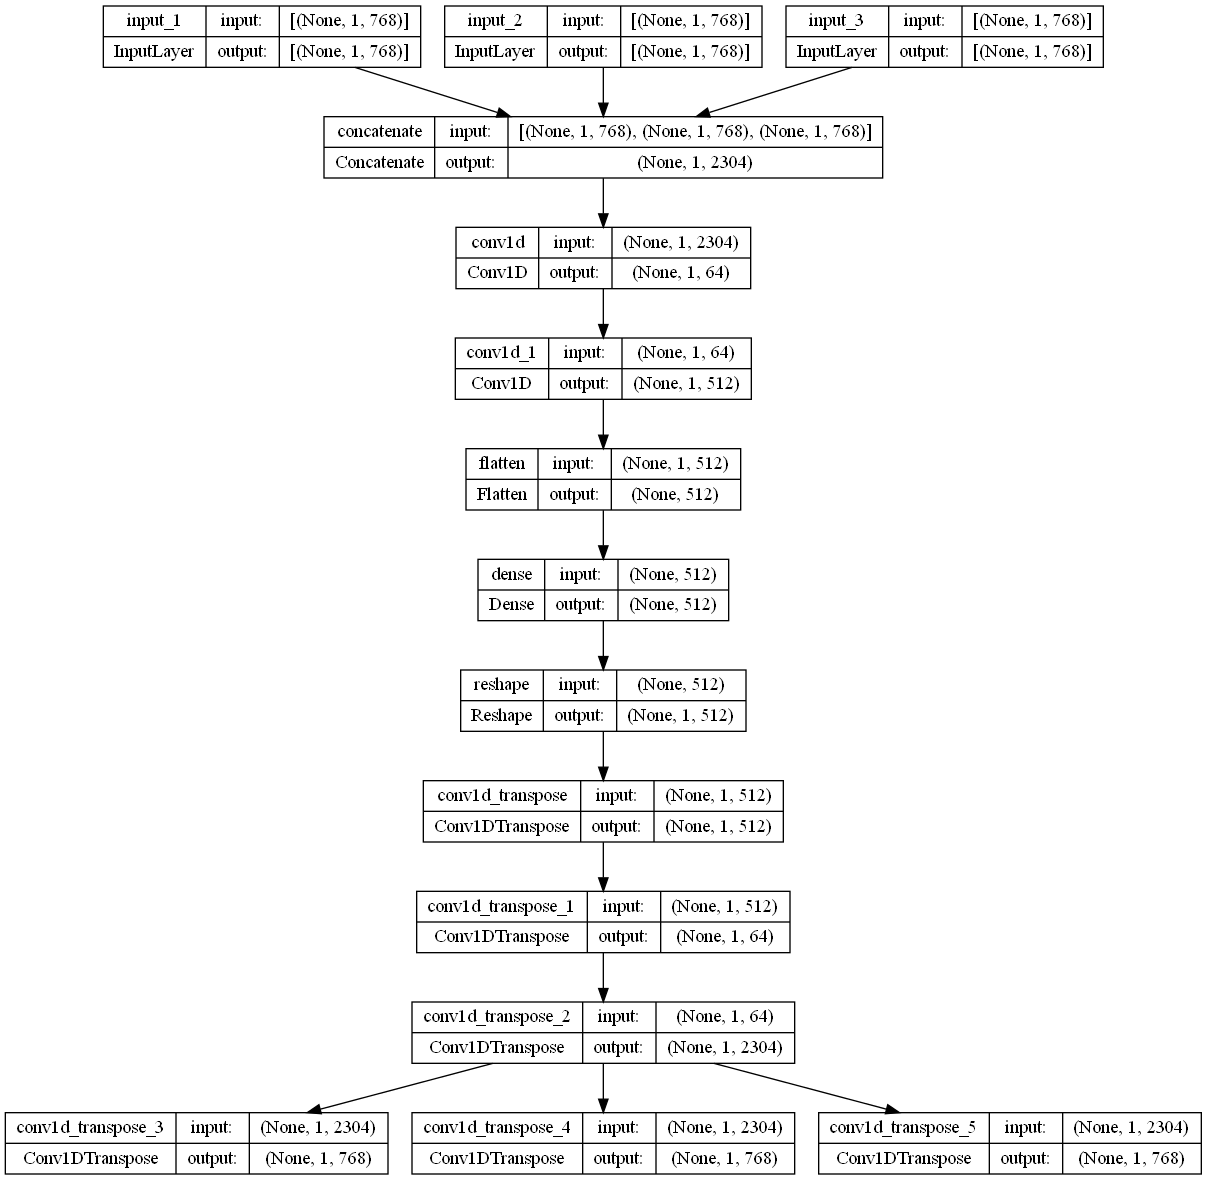

In [13]:
tf.keras.utils.plot_model(autoencoder_model, show_shapes=True)

In [15]:
# tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

In [16]:
history = autoencoder_model.fit([product_name_embedding, category_embedding, about_product_embedding], 
                    [product_name_embedding, category_embedding, about_product_embedding], 
                    epochs=50, validation_split=0.2, shuffle=True)

Epoch 1/50


C:\Users\nihal\Anaconda3\envs\gpuenv\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


498/498 [==============================] - 36s 61ms/step - loss: 0.3569 - conv1d_transpose_3_loss: 0.1611 - conv1d_transpose_4_loss: 0.1140 - conv1d_transpose_5_loss: 0.0817 - conv1d_transpose_3_mse: 0.1611 - conv1d_transpose_4_mse: 0.1140 - conv1d_transpose_5_mse: 0.0817 - val_loss: 0.2955 - val_conv1d_transpose_3_loss: 0.1326 - val_conv1d_transpose_4_loss: 0.0929 - val_conv1d_transpose_5_loss: 0.0700 - val_conv1d_transpose_3_mse: 0.1326 - val_conv1d_transpose_4_mse: 0.0929 - val_conv1d_transpose_5_mse: 0.0700
Epoch 2/50
498/498 [==============================] - 31s 63ms/step - loss: 0.1854 - conv1d_transpose_3_loss: 0.0952 - conv1d_transpose_4_loss: 0.0448 - conv1d_transpose_5_loss: 0.0455 - conv1d_transpose_3_mse: 0.0952 - conv1d_transpose_4_mse: 0.0448 - conv1d_transpose_5_mse: 0.0455 - val_loss: 0.2368 - val_conv1d_transpose_3_loss: 0.1066 - val_conv1d_transpose_4_loss: 0.0686 - val_conv1d_transpose_5_loss: 0.0616 - val_conv1d_transpose_3_mse: 0.1066 - val_conv1d_transpose_4_mse:

498/498 [==============================] - 73s 148ms/step - loss: 0.0657 - conv1d_transpose_3_loss: 0.0327 - conv1d_transpose_4_loss: 0.0129 - conv1d_transpose_5_loss: 0.0202 - conv1d_transpose_3_mse: 0.0327 - conv1d_transpose_4_mse: 0.0129 - conv1d_transpose_5_mse: 0.0202 - val_loss: 0.1667 - val_conv1d_transpose_3_loss: 0.0744 - val_conv1d_transpose_4_loss: 0.0437 - val_conv1d_transpose_5_loss: 0.0485 - val_conv1d_transpose_3_mse: 0.0744 - val_conv1d_transpose_4_mse: 0.0437 - val_conv1d_transpose_5_mse: 0.0485
Epoch 32/50
498/498 [==============================] - 57s 115ms/step - loss: 0.0653 - conv1d_transpose_3_loss: 0.0325 - conv1d_transpose_4_loss: 0.0128 - conv1d_transpose_5_loss: 0.0201 - conv1d_transpose_3_mse: 0.0325 - conv1d_transpose_4_mse: 0.0128 - conv1d_transpose_5_mse: 0.0201 - val_loss: 0.1656 - val_conv1d_transpose_3_loss: 0.0736 - val_conv1d_transpose_4_loss: 0.0431 - val_conv1d_transpose_5_loss: 0.0490 - val_conv1d_transpose_3_mse: 0.0736 - val_conv1d_transpose_4_m

In [17]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

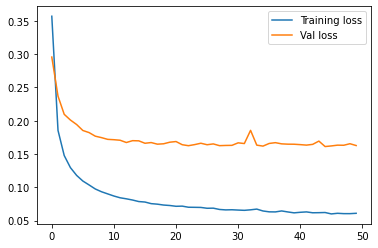

In [18]:
plt.plot(loss, label="Training loss")
plt.plot(validation_loss, label="Val loss")
plt.legend()

In [19]:
autoencoder_model.save('./autoencoder_64_512_50_flipkart_0.06')

INFO:tensorflow:Assets written to: ./autoencoder_64_512_50_flipkart_0.06\assets


INFO:tensorflow:Assets written to: ./autoencoder_64_512_50_flipkart_0.06\assets


In [20]:
autoencoder_model.layers

In [21]:
product_name = Input(shape=(1, 768))
category = Input(shape=(1, 768))
description = Input(shape=(1, 768))

encoder = concatenate([product_name, category, description])
encoder = Conv1D(filters=64, kernel_size=3, strides=1, padding="causal", activation='relu', weights=autoencoder_model.layers[4].get_weights())(encoder)
encoder = Conv1D(filters=512, kernel_size=3, strides=1, padding="causal", activation='relu',  weights=autoencoder_model.layers[5].get_weights())(encoder)
encoder = Flatten()(encoder)
encoder = Dense(512,  weights=autoencoder_model.layers[7].get_weights())(encoder)

encoder_model = Model(inputs=[product_name, category, description], outputs=encoder, name="encoder_model")

In [22]:
encoder_model.summary()

Model: "encoder_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1, 768)]     0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 1, 768)]     0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1, 768)]     0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 2304)      0           ['input_4[0][0]',                
                                                                  'input_5[0][0]',    

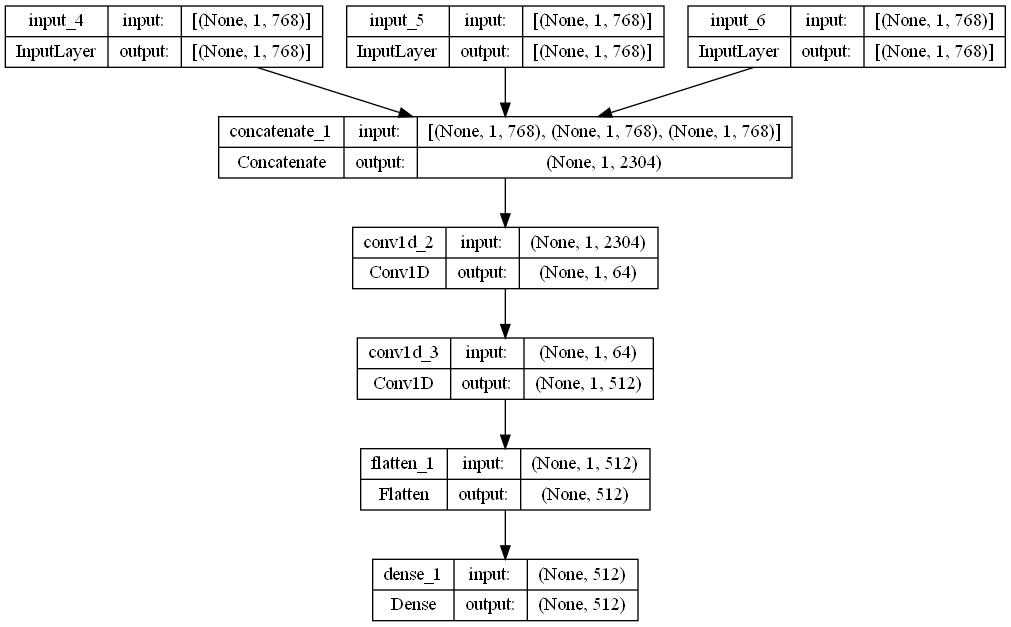

In [24]:
tf.keras.utils.plot_model(encoder_model, to_file='encoder_model.png', show_shapes=True)

In [26]:
encoder_model.save('./encoder_64_512_50_flipkart')

INFO:tensorflow:Assets written to: ./encoder_64_512_50_flipkart\assets


INFO:tensorflow:Assets written to: ./encoder_64_512_50_flipkart\assets


In [5]:
encoder_model = tf.keras.models.load_model('../utils/models/encoder_64_512_50_flipkart')

In [9]:
p1 = ["Wayona Nylon Braided USB", "Computers&Accessories", "High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility."]
p2 = ["AmazonBasics Flexible Premium HDMI Cable", "Electronics", "Flexible, lightweight HDMI cable for connecting media devices to playback display such as HDTVs, projectors, and more|Compatible with Blu-Ray players, computers, Apple TV, Roku, cable, PS4, Xbox One, and other HDMI-compatible devices|Solid copper conductors and full metal jacket shielding for durability and high-performance connectivity|Supports Ethernet, 3D, 4K video and Audio Return Channel (ARC)"]

In [17]:
name_embedding_1 = np.expand_dims(model.encode(p1[0]), axis=0)
category_embedding_1 = np.expand_dims(model.encode(p1[1]), axis=0)
description_embedding_1 = np.expand_dims(model.encode(p1[2]), axis=0)

In [19]:
name_embedding_2 = np.expand_dims(model.encode(p2[0]), axis=0)
category_embedding_2 = np.expand_dims(model.encode(p2[1]), axis=0)
description_embedding_2 = np.expand_dims(model.encode(p2[2]), axis=0)

In [20]:
print(name_embedding_1.shape, name_embedding_2.shape)
print(category_embedding_1.shape, category_embedding_2.shape)
print(description_embedding_1.shape, description_embedding_2.shape)

(1, 768) (1, 768)
(1, 768) (1, 768)
(1, 768) (1, 768)


In [23]:
name_embedding_1.shape

(1, 768)

In [24]:
encoder_model.summary()

Model: "encoder_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1, 768)]     0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 1, 768)]     0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1, 768)]     0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 2304)      0           ['input_4[0][0]',                
                                                                  'input_5[0][0]',    

In [28]:
encoded_vectors_1 = encoder_model.predict([name_embedding_1.reshape(1, 1, -1), category_embedding_1.reshape(1, 1, -1), description_embedding_1.reshape(1, 1, -1)])

1/1 [==============================] - 5s 5s/step


In [31]:
encoded_vectors_2 = encoder_model.predict([name_embedding_2.reshape(1, 1, -1), category_embedding_2.reshape(1, 1, -1), description_embedding_2.reshape(1, 1, -1)])

1/1 [==============================] - 0s 52ms/step


In [32]:
cosine_similarity(encoded_vectors_1.reshape(1, -1), encoded_vectors_2.reshape(1, -1))

array([[0.6931172]], dtype=float32)

In [30]:
encoded_vectors_1.shape

(1, 512)

In [27]:
encoded_vectors = encoder_model.predict([product_name_embedding, category_embedding, about_product_embedding])

 14/623 [..............................] - ETA: 2s 

C:\Users\nihal\Anaconda3\envs\gpuenv\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


623/623 [==============================] - 2s 4ms/step


In [28]:
encoded_vectors[0].shape

(512,)

In [29]:
encoded_vectors.shape

(19917, 512)

In [30]:
with open('encoded_vectors.npy', 'wb') as f:
    np.save(f, encoded_vectors)

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
cosine_similarity(encoded_vectors[0].reshape(1, -1), encoded_vectors[1].reshape(1, -1))

array([[-0.08718302]], dtype=float32)

In [61]:
df['product_name'][800], df['product_name'][120]

('MAONO AU-400 Lavalier Auxiliary Omnidirectional Microphone (Black)',
 'Belkin Apple Certified Lightning To Type C Cable, Tough Unbreakable Braided Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters)    White')

In [34]:
cosine_similarity(encoded_vectors[800].reshape(1, -1), encoded_vectors[120].reshape(1, -1))

array([[-0.09176696]], dtype=float32)

In [35]:
loaded_encodings = np.load('./encoded_vectors.npy')

In [36]:
loaded_encodings.shape

(19917, 512)

In [37]:
encoded_vectors.shape

(19917, 512)